In [ ]:
## steps
    #1. Load and understand the data
    #2.clean the data=converting alpha into numeric use labelencoder for 2 options and getdummies for more then 2 options
    #3.Feature Scaling==standard scaler or minmax scalor
    #4.Split the data
    #5.Train a model
    #6.Make Predictions
    #7.Evaluate the model
    #8.Visualize results
    #9.Improve/Experiments
    #10. Wrap Up

In [2]:
import pandas as pd

In [9]:
df=pd.read_csv('students_records.csv')
print(df.head())

print('Dataset shape')
print(f'Rows:{df.shape[0]}, Columns:{df.shape[1]}')

print('Dataset info')
print(df.info())

print('Summary Statistics')
print(df.describe(include='all'))

print('Missing Values')
print(df.isnull().sum())


    Student  StudyHours  Attendance  PastScore InternetAccess  SleepHours  \
0  Student1           8          92         41             No           6   
1  Student2           1          85         73             No           6   
2  Student3           9          80         79            Yes           7   
3  Student4           4          52         61            Yes           4   
4  Student5           7          95         44             No           7   

  Result  
0   Fail  
1   Fail  
2   Pass  
3   Fail  
4   Fail  
Dataset shape
Rows:25, Columns:7
Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Student         25 non-null     object
 1   StudyHours      25 non-null     int64 
 2   Attendance      25 non-null     int64 
 3   PastScore       25 non-null     int64 
 4   InternetAccess  25 non-null     object
 5   SleepHours

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv('students_records.csv')

print('Missing values in each column:')
print(df.isnull().sum())

le=LabelEncoder()
df['InternetAccess']=le.fit_transform(df['InternetAccess']) ##yes=1 and no=0
df['Result']=le.fit_transform(df['Result'])  

print('After Encoding')
print(df.head())

print('Data-types after cleaning ')
print(df.dtypes)


Missing values in each column:
Student           0
StudyHours        0
Attendance        0
PastScore         0
InternetAccess    0
SleepHours        0
Result            0
dtype: int64
After Encoding
    Student  StudyHours  Attendance  PastScore  InternetAccess  SleepHours  \
0  Student1           8          92         41               0           6   
1  Student2           1          85         73               0           6   
2  Student3           9          80         79               1           7   
3  Student4           4          52         61               1           4   
4  Student5           7          95         44               0           7   

   Result  
0       0  
1       0  
2       1  
3       0  
4       0  
Data-types after cleaning 
Student           object
StudyHours         int64
Attendance         int64
PastScore          int64
InternetAccess     int64
SleepHours         int64
Result             int64
dtype: object


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Classification Report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



c:\Users\Madhusudan Bhandari\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Madhusudan Bhandari\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Madhusudan Bhandari\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter

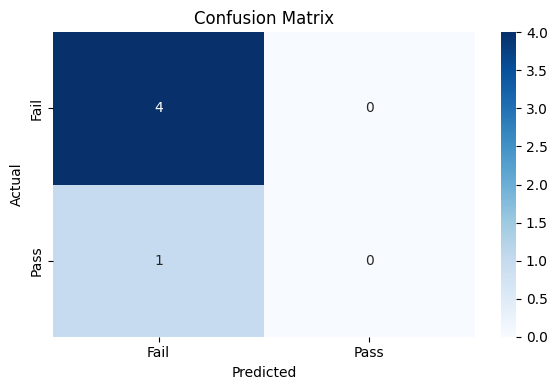

Predict you result
Prediction based on input: Pass


In [21]:
df=pd.read_csv('students_records.csv')

le=LabelEncoder()
df['InternetAccess']=le.fit_transform(df['InternetAccess'])
df['Result']=le.fit_transform(df['Result'])

features=['StudyHours','Attendance','PastScore','SleepHours']
scaler=StandardScaler()
df_scaled=df.copy()
df_scaled[features]=scaler.fit_transform(df[features])

X=df_scaled[features]
y=df_scaled['Result']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print('Classification Report')
print(classification_report(y_test,y_pred))

conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['Fail','Pass'],yticklabels=['Fail','Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print('Predict you result')
try:
    study_hours=float(input('Enter study hours'))
    attendence=float(input('Enter attendence'))
    past_score=float(input('Enter past score'))
    sleep_hours=float(input('Enter sleep hours'))

    user_input_df=pd.DataFrame([{
        'StudyHours':study_hours,
        'Attendance':attendence,
        'PastScore':past_score,
        'SleepHours':sleep_hours
    }])

    user_input_scaled=scaler.transform(user_input_df)
    prediction=model.predict(user_input_df)
    
    result='Pass' if prediction==1 else 'Fail'
    print('Prediction based on input:',result)
except Exception as e:
    print('An error occured',e)
